In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("./google-play-store-apps/googleplaystore.csv")

In [3]:
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
data.describe(include="all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
cdata =  data.copy()

### Idea is to increase the price of the undervalued apps, so we need to take apps that paid and are not free

In [8]:
cdata = cdata[cdata["Type"] == "Paid"]

#### Observation - Type column has no relevance now, so we can drop this.

In [9]:
cdata.drop(columns ="Type",inplace=True)

In [10]:
cdata.shape

(800, 12)

In [11]:
def clean_sizes(size):
    size = size.replace("M","").replace("+","").replace(",","")
    if size == "Varies with device":
        size = pd.np.NaN
    elif size.endswith("k"):
        size = float(size[:-1])/1000
    return size

def clean_prices(price):
    price = price.replace("$","").replace(",","")    
    return price

def clean_installs(install):
    install = install.replace("M","").replace("+","").replace(",","")    
    return install

def clean_reviews(review):
    review = review.replace("M","").replace("+","").replace(",","")    
    return review

In [12]:
cdata['Price'] = cdata['Price'].apply(clean_prices).astype("float")
cdata['Reviews'] = cdata['Reviews'].apply(clean_reviews).astype("int")
cdata['Size'] = cdata['Size'].apply(clean_sizes).astype("float")
cdata['Installs'] = cdata['Installs'].apply(clean_installs).astype("int")

In [13]:
cdata["Last Updated"] = pd.to_datetime(cdata['Last Updated'])
cdata['Year_added']=cdata['Last Updated'].dt.year
cdata['Month_added']=cdata['Last Updated'].dt.month

In [14]:
cdata[cdata['Reviews'] == 0]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year_added,Month_added
478,Truth or Dare Pro,DATING,NaN,0,20.000,50,1.49,Teen,Dating,2017-09-01,1.0,4.0 and up,2017,9
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,NaN,0,0.018,100,2.99,Everyone,Dating,2017-07-25,1.0.1,4.0 and up,2017,7
2294,Number Therapy,MEDICAL,NaN,0,5.300,50,14.99,Everyone,Medical,2017-10-03,1.0,4.0.3 and up,2017,10
2422,Visualmed,MEDICAL,NaN,0,3.100,1,2.99,Everyone,Medical,2018-08-01,1.0,4.1 and up,2018,8
2424,OrthoFlow,MEDICAL,NaN,0,66.000,10,5.99,Everyone,Medical,2018-07-15,1.0.0,4.2 and up,2018,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9917,Eu Sou Rico,FINANCE,NaN,0,1.400,0,394.99,Everyone,Finance,2018-07-11,1.0,4.0.3 and up,2018,7
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,NaN,0,40.000,0,399.99,Everyone,Lifestyle,2017-12-01,MONEY,4.1 and up,2017,12
10668,FN model 1900 pistol explained,BOOKS_AND_REFERENCE,NaN,0,8.200,10,6.49,Everyone,Books & Reference,2015-09-05,Android 3.0 - 2015,1.6 and up,2015,9
10674,Pistolet FN 1906 expliqué,BOOKS_AND_REFERENCE,NaN,0,5.200,10,5.49,Everyone,Books & Reference,2014-08-17,Android 2.0 - 2014,1.6 and up,2014,8


In [15]:
cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 234 to 10798
Data columns (total 14 columns):
App               800 non-null object
Category          800 non-null object
Rating            647 non-null float64
Reviews           800 non-null int32
Size              724 non-null float64
Installs          800 non-null int32
Price             800 non-null float64
Content Rating    800 non-null object
Genres            800 non-null object
Last Updated      800 non-null datetime64[ns]
Current Ver       798 non-null object
Android Ver       799 non-null object
Year_added        800 non-null int64
Month_added       800 non-null int64
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2), object(6)
memory usage: 87.5+ KB


#### There may be cases where data is entered more than once, need to check that...use duplicated()...

In [16]:
app_not_unique = cdata[cdata["App"].duplicated()]

In [17]:
app_not_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 290 to 9574
Data columns (total 14 columns):
App               44 non-null object
Category          44 non-null object
Rating            43 non-null float64
Reviews           44 non-null int32
Size              39 non-null float64
Installs          44 non-null int32
Price             44 non-null float64
Content Rating    44 non-null object
Genres            44 non-null object
Last Updated      44 non-null datetime64[ns]
Current Ver       44 non-null object
Android Ver       44 non-null object
Year_added        44 non-null int64
Month_added       44 non-null int64
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2), object(6)
memory usage: 4.8+ KB


In [18]:
app_not_unique[:3] #below are duplicates

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year_added,Month_added
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018,3
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2017,4
571,"Moco+ - Chat, Meet People",DATING,4.2,1546,NaN,10000,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up,2018,6


In [19]:
cdata[cdata['App'] == 'Pedi STAT'] #Example of duplicates

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year_added,Month_added
2245,Pedi STAT,MEDICAL,4.6,129,2.9,10000,5.49,Everyone,Medical,2018-04-06,3.0.1.0,4.1 and up,2018,4
2399,Pedi STAT,MEDICAL,4.6,129,2.9,10000,5.49,Everyone,Medical,2018-04-06,3.0.1.0,4.1 and up,2018,4


In [20]:
cdata.drop_duplicates("App",inplace=True)
cdata.sort_values("Reviews",ascending=False,inplace=True)
cdata.reset_index(drop=True,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D4EA86978>]],
      dtype=object)

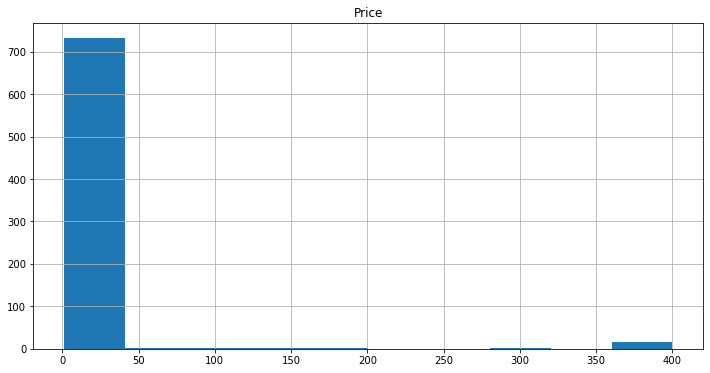

In [21]:
cdata.hist(column="Price",figsize=(12,6))

#### Observation - There are bunch of apps between 0-48 dollars and very few at 50-150, very few at 200-235 and 250-325 and a little more at 360-400

In [22]:
cdata.corr(method ='pearson') 

,Rating,Reviews,Size,Installs,Price,Year_added,Month_added
Rating,1.000000,0.045085,0.124116,0.059903,-0.112617,0.156850,-0.033117
Reviews,0.045085,1.000000,0.163352,0.807545,-0.014407,0.040309,0.014733
Size,0.124116,0.163352,1.000000,0.114675,-0.064336,0.194241,0.023306
Installs,0.059903,0.807545,0.114675,1.000000,-0.021525,0.060151,0.027199
Price,-0.112617,-0.014407,-0.064336,-0.021525,1.000000,0.092848,0.026759
Year_added,0.156850,0.040309,0.194241,0.060151,0.092848,1.000000,-0.157850
Month_added,-0.033117,0.014733,0.023306,0.027199,0.026759,-0.157850,1.000000


#### Observation - Installs and Reviews correlation being .808 is pretty close to 1. So, we can conclude that lot of people have installed and written app reviews.

#### Current version is irrrelevant here, so dropping the column

In [23]:
cdata.drop(columns="Current Ver",inplace=True)

In [24]:
cdata["Category"].unique()

array(['FAMILY', 'GAME', 'SPORTS', 'PERSONALIZATION', 'PRODUCTIVITY',
       'WEATHER', 'TOOLS', 'COMMUNICATION', 'PHOTOGRAPHY', 'EDUCATION',
       'LIFESTYLE', 'FINANCE', 'HEALTH_AND_FITNESS', 'TRAVEL_AND_LOCAL',
       'BUSINESS', 'PARENTING', 'ENTERTAINMENT', 'MAPS_AND_NAVIGATION',
       'VIDEO_PLAYERS', 'MEDICAL', 'AUTO_AND_VEHICLES', 'FOOD_AND_DRINK',
       'DATING', 'BOOKS_AND_REFERENCE', 'ART_AND_DESIGN', 'SHOPPING',
       'SOCIAL', 'NEWS_AND_MAGAZINES', 'LIBRARIES_AND_DEMO', 'EVENTS'],
      dtype=object)

In [25]:
cdata["Genres"].unique()

array(['Arcade;Action & Adventure', 'Action', 'Strategy',
       'Puzzle;Brain Games', 'Card;Action & Adventure', 'Sports',
       'Personalization', 'Arcade', 'Puzzle', 'Productivity', 'Weather',
       'Tools', 'Sports;Action & Adventure', 'Communication',
       'Role Playing', 'Photography', 'Card', 'Simulation;Education',
       'Adventure', 'Education;Pretend Play', 'Lifestyle',
       'Strategy;Action & Adventure', 'Board', 'Finance',
       'Health & Fitness', 'Role Playing;Action & Adventure', 'Music',
       'Travel & Local', 'Business', 'Simulation',
       'Adventure;Action & Adventure', 'Parenting',
       'Adventure;Brain Games', 'Entertainment', 'Maps & Navigation',
       'Video Players & Editors', 'Racing', 'Medical', 'Auto & Vehicles',
       'Educational;Pretend Play', 'Casual;Pretend Play',
       'Education;Creativity', 'Education', 'Board;Brain Games',
       'Food & Drink', 'Action;Action & Adventure',
       'Simulation;Pretend Play', 'Dating', 'Books & Referenc

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D4EA509E8>]],
      dtype=object)

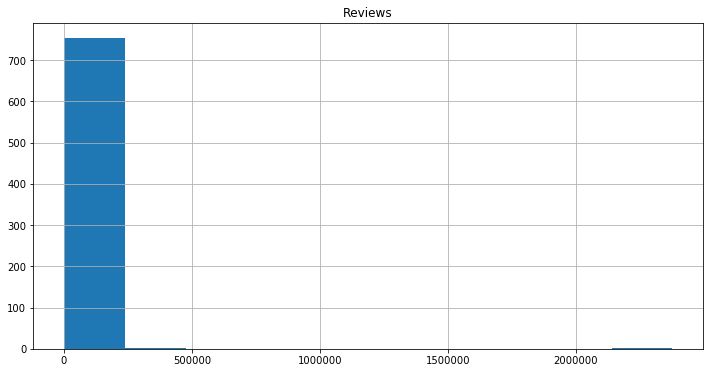

In [26]:
cdata.hist(column="Reviews",figsize=(12,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D51118518>]],
      dtype=object)

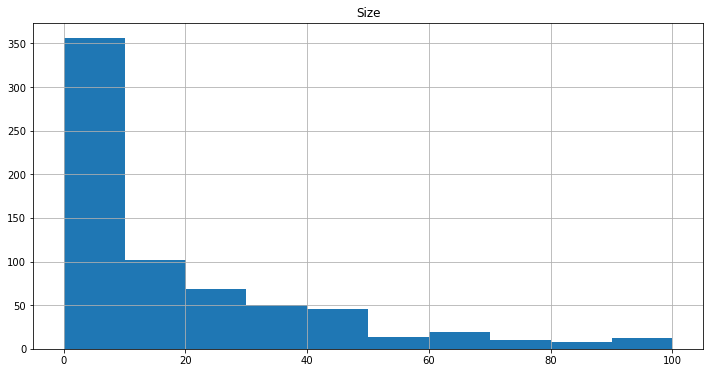

In [27]:
cdata.hist(column="Size",figsize=(12,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016D50FDAA20>]],
      dtype=object)

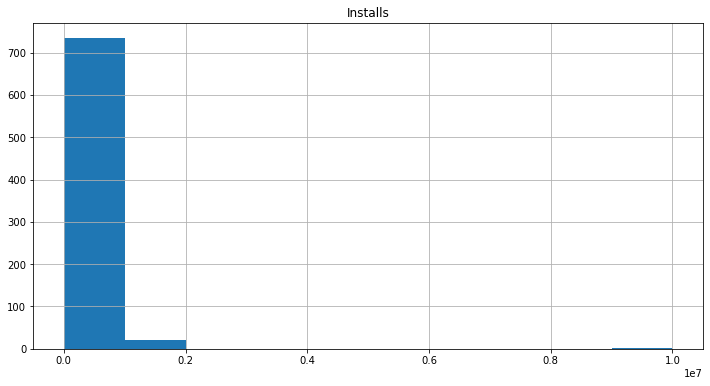

In [28]:
cdata.hist(column="Installs",figsize=(12,6))


#### Point to Note: We should be wary of using Installs, this data set has values like 1,000,000+...which is minimum value and also downloads may be free trial and may not always convert to paid ones.

In [29]:
cdata["Category"].value_counts()

FAMILY                 183
MEDICAL                 83
GAME                    82
PERSONALIZATION         81
TOOLS                   78
BOOKS_AND_REFERENCE     28
PRODUCTIVITY            28
COMMUNICATION           27
SPORTS                  24
PHOTOGRAPHY             19
LIFESTYLE               19
FINANCE                 17
HEALTH_AND_FITNESS      15
TRAVEL_AND_LOCAL        12
BUSINESS                12
WEATHER                  8
DATING                   6
MAPS_AND_NAVIGATION      5
VIDEO_PLAYERS            4
EDUCATION                4
SOCIAL                   3
AUTO_AND_VEHICLES        3
ART_AND_DESIGN           3
FOOD_AND_DRINK           2
PARENTING                2
ENTERTAINMENT            2
NEWS_AND_MAGAZINES       2
SHOPPING                 2
EVENTS                   1
LIBRARIES_AND_DEMO       1
Name: Category, dtype: int64

#### Observation - Categories - FAMILY, MEDICAL, GAME, PERSONALIZATION, TOOLS are top 5, coming to roughly 67% of the total number of apps.

In [30]:
cdata["Genres"].value_counts()

Medical                         83
Personalization                 81
Tools                           78
Education                       30
Books & Reference               28
                                ..
Strategy;Action & Adventure      1
Card;Action & Adventure          1
Books & Reference;Creativity     1
Simulation;Pretend Play          1
Books & Reference;Education      1
Name: Genres, Length: 72, dtype: int64

#### Observation - Genres - Medical, Personalization, Tools, Education, Books are top 4, coming to roughly 40% of the total number of apps. There are multiple values in genres separated by ';'.

In [73]:
gen_rat = cdata.groupby(["Genres","Content Rating","Price"])["App"].count()
gen_rat[150:200]

Genres                    Content Rating  Price 
Educational;Education     Everyone        7.49      1
Educational;Pretend Play  Everyone        1.99      1
                                          2.99      4
Entertainment             Everyone        0.99      3
                                          1.26      1
                                          1.49      2
                                          1.99      2
                                          2.49      1
                                          4.99      1
                                          46.99     1
                                          389.99    1
                                          399.99    3
                          Mature 17+      0.99      1
                                          2.99      1
                                          3.99      1
                          Teen            1.49      1
Events                    Everyone        109.99    1
Finance                   Everyon

#### Observation - In some genres/content rating like Communication, Business, Finance, ENtertainment, Lifestyle -  there is great variation between min and max pricing within that genre.

In [32]:
cut_plabels = ['Economical', 'Fair', 'Expensive','Upscale']
cut_pbins = [0, 10,50,200,450]
cdata['Price_bins'] = pd.cut(cdata['Price'], bins=cut_pbins, labels=cut_plabels)
cdata['Price_bins'] 

0      Economical
1      Economical
2      Economical
3      Economical
4      Economical
          ...    
751    Economical
752    Economical
753    Economical
754    Economical
755    Economical
Name: Price_bins, Length: 756, dtype: category
Categories (4, object): [Economical < Fair < Expensive < Upscale]

In [33]:
print(cdata['Rating'].isnull().sum())      
cdata['Rating'].fillna(4, inplace=True)
print(cdata['Rating'].isnull().sum())      

152
0


#### Rating column for paid apps is null for 152 rows. This makes up 20% of the paid apps, which is significant amount. So we can set it to lowest rating in the dataset, which is 4.

In [34]:
gdata = cdata.copy()
print("Number of NaNs: ",gdata['Size'].isnull().sum())
gdata['Size'].dropna(inplace=True)
print("Min value: ",gdata["Size"].min())
size_mean = gdata["Size"].mean()
print("Mean value: ",gdata["Size"].mean())
print("Max value:",gdata["Size"].max())

Number of NaNs:  71
Min value:  0.014
Mean value:  19.012554744525545
Max value: 100.0


#### There are 71 NaNs in Size column, which forms around 10% of paid apps. If we dont consider the NaNs, we get the mean as 19. So we can subsitute this value in place of NaNs.

In [35]:
print(cdata['Size'].isnull().sum())
cdata['Size'].fillna(size_mean, inplace=True)
print(cdata['Size'].isnull().sum())

71
0


In [36]:
cut_labels = ['Ok', 'Good', 'High', 'Excellent']
cut_bins = [0, 4, 4.3, 4.5, 5]
cdata['Rating_bins'] = pd.cut(cdata['Rating'], bins=cut_bins, labels=cut_labels)
cdata['Rating_bins']

0           High
1      Excellent
2           High
3      Excellent
4      Excellent
         ...    
751           Ok
752           Ok
753           Ok
754           Ok
755           Ok
Name: Rating_bins, Length: 756, dtype: category
Categories (4, object): [Ok < Good < High < Excellent]

In [37]:
print(cdata['Android Ver'].isnull().sum())
cdata['Android Ver'].fillna("4.1 and up", inplace=True)
print(cdata['Android Ver'].isnull().sum())

1
0


In [38]:
cut_slabels = ['10MB', '25MB', '50MB', '75MB', '100MB']
cut_sbins = [0, 10,25, 50, 75,100]
cdata['Size_bins'] = pd.cut(cdata['Size'], bins=cut_sbins, labels=cut_slabels)
cdata['Size_bins']

0       25MB
1       50MB
2       50MB
3      100MB
4       75MB
       ...  
751     25MB
752     25MB
753     10MB
754     10MB
755     10MB
Name: Size_bins, Length: 756, dtype: category
Categories (5, object): [10MB < 25MB < 50MB < 75MB < 100MB]

In [39]:
cut_rlabels = ['10k', '50k', '200k', '500k', '1M','2M','5M']
cut_rbins = [-1, 10000,50000, 200000, 500000,1000000, 2000000,5000000]
cdata['Reviews_bins'] = pd.cut(cdata['Reviews'], bins=cut_rbins, labels=cut_rlabels)
cdata['Reviews_bins']

0        5M
1      500k
2      500k
3      200k
4      200k
       ... 
751     10k
752     10k
753     10k
754     10k
755     10k
Name: Reviews_bins, Length: 756, dtype: category
Categories (7, object): [10k < 50k < 200k < 500k < 1M < 2M < 5M]

In [40]:
cat_rev_price = cdata.groupby(["Category","Reviews_bins","Price_bins"]).mean()[['Price']]
cat_rev_price

Price
Category       Reviews_bins Price_bins       
ART_AND_DESIGN 10k          Economical   1.99
                            Fair          NaN
                            Expensive     NaN
                            Upscale       NaN
               50k          Economical    NaN
...                                       ...
WEATHER        2M           Upscale       NaN
               5M           Economical    NaN
                            Fair          NaN
                            Expensive     NaN
                            Upscale       NaN

[840 rows x 1 columns]

In [41]:
def label_catrev(row):
    """For each segment in `category_reviews_price_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""

    pb = row["Price_bins"]
    rb = row["Reviews_bins"]
    c = row["Category"]
    price = row["Price"]

    if price < cat_rev_price.loc[(c,rb,pb)][0]:
        return 1
    else:
        return 0
    
cdata["cat_rev_price_crit"] = cdata.apply(label_catrev, axis="columns")
cdata["cat_rev_price_crit"]

0      0
1      1
2      0
3      0
4      1
      ..
751    1
752    1
753    1
754    1
755    1
Name: cat_rev_price_crit, Length: 756, dtype: int64

In [42]:
cat_rat_price = cdata.groupby(["Category","Rating_bins","Price_bins"]).mean()[['Price']]
cat_rat_price

Price
Category       Rating_bins Price_bins       
ART_AND_DESIGN Ok          Economical    NaN
                           Fair          NaN
                           Expensive     NaN
                           Upscale       NaN
               Good        Economical    NaN
...                                      ...
WEATHER        High        Upscale       NaN
               Excellent   Economical   4.24
                           Fair          NaN
                           Expensive     NaN
                           Upscale       NaN

[480 rows x 1 columns]

In [43]:
def label_catrat(row):
    """For each segment in `genres_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""

    pb = row["Price_bins"]
    rb = row["Rating_bins"]
    c = row["Category"]
    price = row["Price"]

    if price < cat_rat_price.loc[(c,rb,pb)][0]:
        return 1
    else:
        return 0
    
cdata["cat_rat_price_crit"] = cdata.apply(label_catrat, axis="columns")
cdata["cat_rat_price_crit"]

0      0
1      1
2      0
3      1
4      1
      ..
751    1
752    1
753    1
754    1
755    1
Name: cat_rat_price_crit, Length: 756, dtype: int64

In [44]:
cat_year_price = cdata.groupby(["Category",'Year_added',"Price_bins"]).mean()[['Price']]
cat_year_price

Price
Category       Year_added Price_bins       
ART_AND_DESIGN 2011       Economical    NaN
                          Fair          NaN
                          Expensive     NaN
                          Upscale       NaN
               2012       Economical    NaN
...                                     ...
WEATHER        2017       Upscale       NaN
               2018       Economical   3.29
                          Fair          NaN
                          Expensive     NaN
                          Upscale       NaN

[960 rows x 1 columns]

In [45]:
def label_catyear(row):
    """For each segment in `genres_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""

    pb = row["Price_bins"]
    rb = row["Year_added"]
    c = row["Category"]
    price = row["Price"]

    if price < cat_year_price.loc[(c,rb,pb)][0]:
        return 1
    else:
        return 0
    
cdata["cat_year_price_crit"] = cdata.apply(label_catyear, axis="columns")
cdata["cat_year_price_crit"]

0      0
1      1
2      0
3      1
4      1
      ..
751    1
752    1
753    1
754    1
755    1
Name: cat_year_price_crit, Length: 756, dtype: int64

In [46]:
gen_ver_price = cdata.groupby(["Genres",'Android Ver',"Price_bins"]).mean()[['Price']]
gen_ver_price

Price
Genres  Android Ver        Price_bins       
Action  1.5 and up         Economical    NaN
                           Fair          NaN
                           Expensive     NaN
                           Upscale       NaN
        1.6 and up         Economical    NaN
...                                      ...
Weather 8.0 and up         Upscale       NaN
        Varies with device Economical   4.49
                           Fair          NaN
                           Expensive     NaN
                           Upscale       NaN

[6912 rows x 1 columns]

In [47]:
def label_versions(row):
    """For each segment in `genres_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""

    aff = row["Price_bins"]
    gc = row["Genres"]
    av = row["Android Ver"]
    price = row["Price"]

    if price < gen_ver_price.loc[(gc,av,aff)][0]:
        return 1
    else:
        return 0
    
cdata["gen_ver_price_crit"] = cdata.apply(label_versions, axis="columns")
cdata["gen_ver_price_crit"]

0      0
1      1
2      0
3      1
4      0
      ..
751    1
752    1
753    0
754    1
755    0
Name: gen_ver_price_crit, Length: 756, dtype: int64

In [48]:
cdata["genre_count"] = cdata["Genres"].str.count(";")+1

gen_count_price = cdata.groupby(["genre_count",'Price_bins']).mean()[["Price"]]
gen_count_price

Price
genre_count Price_bins            
1           Economical    3.194690
            Fair         20.711569
            Expensive   118.325000
            Upscale     392.049412
2           Economical    3.312857
            Fair               NaN
            Expensive          NaN
            Upscale            NaN

In [49]:
def label_genres(row):
    """For each segment in `genres_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""

    aff = row["Price_bins"]
    gc = row["genre_count"]
    price = row["Price"]

    if price < gen_count_price.loc[(gc,aff)][0]:
        return 1
    else:
        return 0
    
cdata["gen_price_crit"] = cdata.apply(label_genres, axis="columns")
cdata["gen_price_crit"]

0      0
1      1
2      0
3      1
4      1
      ..
751    1
752    1
753    1
754    1
755    1
Name: gen_price_crit, Length: 756, dtype: int64

In [50]:
cat_size_price = cdata.groupby(["Category","Size_bins","Price_bins"]).mean()[['Price']]
cat_size_price

Price
Category       Size_bins Price_bins       
ART_AND_DESIGN 10MB      Economical   1.99
                         Fair          NaN
                         Expensive     NaN
                         Upscale       NaN
               25MB      Economical    NaN
...                                    ...
WEATHER        75MB      Upscale       NaN
               100MB     Economical    NaN
                         Fair          NaN
                         Expensive     NaN
                         Upscale       NaN

[600 rows x 1 columns]

In [51]:
def label_catsizeprice(row):
    """For each segment in `genres_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""

    pb = row["Price_bins"]
    gc = row["Category"]
    av = row["Size_bins"]
    price = row["Price"]

    if price < cat_size_price.loc[(gc,av,pb)][0]:
        return 1
    else:
        return 0
    
cdata["cat_size_price_crit"] = cdata.apply(label_catsizeprice, axis="columns")
cdata["cat_size_price_crit"]

0      0
1      1
2      0
3      1
4      1
      ..
751    1
752    1
753    1
754    1
755    1
Name: cat_size_price_crit, Length: 756, dtype: int64

In [52]:
gen_cont_price = cdata.groupby(["Genres","Content Rating","Price_bins"]).mean()[['Price']]
gen_cont_price

Price
Genres  Content Rating Price_bins          
Action  Everyone       Economical  3.823333
                       Fair             NaN
                       Expensive        NaN
                       Upscale          NaN
        Everyone 10+   Economical  1.656667
...                                     ...
Weather Mature 17+     Upscale          NaN
        Teen           Economical       NaN
                       Fair             NaN
                       Expensive        NaN
                       Upscale          NaN

[1152 rows x 1 columns]

In [53]:
def label_gencontprice(row):
    """For each segment in `genres_mean`,
    labels the apps that cost less than its segment's mean with `1`
    and the others with `0`."""

    pb = row["Price_bins"]
    gc = row["Genres"]
    cr = row["Content Rating"]
    price = row["Price"]

    if price < gen_cont_price.loc[(gc,cr,pb)][0]:
        return 1
    else:
        return 0
    
cdata["gen_cont_price_crit"] = cdata.apply(label_gencontprice, axis="columns")
cdata["gen_cont_price_crit"]

0      0
1      1
2      0
3      1
4      1
      ..
751    1
752    1
753    1
754    1
755    1
Name: gen_cont_price_crit, Length: 756, dtype: int64

In [68]:
criteria = ["gen_cont_price_crit", "cat_size_price_crit", "gen_price_crit","gen_ver_price_crit","cat_year_price_crit","cat_rat_price_crit","cat_rev_price_crit"]
cdata["Result"] = cdata[criteria].mode(axis='columns')
nr_eligible = cdata["Result"].sum()
print("Number of under valued apps: ",nr_eligible)
print("Percentage of under valued apps in total apps are: ",nr_eligible/cdata.shape[0] *100)

Number of undervalued apps:  436
Percentage of undervalued apps in total apps are:  57.67195767195767


## Number of under valued apps:  436
## Percentage of under valued apps in total apps are:  57.67195767195767

In [55]:
undervalued_apps = cdata[cdata["Result"] == 1]  #gen_cont_price

In [56]:
def getMean(row):
    cont = row["Content Rating"]
    gen = row["Genres"]
    pb = row["Price_bins"]
    price = row["Price"]
    new_price = gen_cont_price.loc[gen,cont,pb]
    return new_price
    
undervalued_apps['New Price'] = undervalued_apps.apply(getMean,axis="columns")

c:\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [57]:
undervalued_apps["Impact"] = (undervalued_apps['New Price'] - undervalued_apps['Price']) * undervalued_apps['Installs']


c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [58]:
undervalued_apps

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,...,cat_rat_price_crit,cat_year_price_crit,gen_ver_price_crit,genre_count,gen_price_crit,cat_size_price_crit,gen_cont_price_crit,Result,New Price,Impact
1,Hitman Sniper,GAME,4.6,408292,29.00,10000000,0.99,Mature 17+,Action,2018-07-12,...,1,1,1,1,1,1,1,1,2.990000,2.000000e+07
3,Bloons TD 5,FAMILY,4.6,190086,94.00,1000000,2.99,Everyone,Strategy,2018-07-13,...,1,1,1,1,1,1,1,1,3.115000,1.250000e+05
4,Where's My Water?,FAMILY,4.7,188740,69.00,1000000,1.99,Everyone,Puzzle;Brain Games,2018-07-05,...,1,1,0,2,1,1,1,1,2.490000,5.000000e+05
5,Card Wars - Adventure Time,FAMILY,4.3,129603,23.00,1000000,2.99,Everyone 10+,Card;Action & Adventure,2016-02-11,...,1,1,0,2,1,1,0,1,2.990000,0.000000e+00
6,True Skate,SPORTS,4.4,129409,73.00,1000000,1.99,Everyone,Sports,2018-08-04,...,1,1,1,1,1,1,1,1,3.043913,1.053913e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,DK Primrose for KLWP,PERSONALIZATION,4.0,0,16.00,1,0.99,Everyone,Personalization,2017-12-02,...,1,1,1,1,1,1,1,1,1.857778,8.677778e-01
752,Glanceable Ap Watch Face,PERSONALIZATION,4.0,0,11.00,5,0.99,Everyone,Personalization,2016-08-14,...,1,1,1,1,1,1,1,1,1.857778,4.338889e+00
753,AP Series Solution Pro,FAMILY,4.0,0,7.40,0,1.99,Everyone,Education,2017-07-30,...,1,1,0,1,1,1,1,1,3.384800,0.000000e+00
754,Cargo de Praça PM DF,PRODUCTIVITY,4.0,0,5.20,10,2.99,Everyone,Productivity,2018-05-07,...,1,1,1,1,1,1,1,1,3.525000,5.350000e+00


In [59]:
total_impact = undervalued_apps["Impact"].sum()
print("There will be a increase in {} dollars".format(round(total_impact,2)))

There will be a increase in 43701986.43 dollars


## There will be a increase in 43701984.76 dollars


### Below are the Upscale apps

In [71]:
undervalued_apps[undervalued_apps['Price_bins'] == 'Upscale']

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,...,cat_rat_price_crit,cat_year_price_crit,gen_ver_price_crit,genre_count,gen_price_crit,cat_size_price_crit,gen_cont_price_crit,Result,New Price,Impact
258,I am rich VIP,LIFESTYLE,3.8,411,2.6,10000,299.99,Everyone,Lifestyle,2018-07-21,...,1,1,0,1,1,1,1,1,379.991667,800016.666667
296,I Am Rich,FAMILY,3.6,217,4.9,10000,389.99,Everyone,Entertainment,2018-06-22,...,1,1,0,1,1,1,1,1,397.490000,75000.000000
435,I am extremely Rich,LIFESTYLE,2.9,41,2.9,1000,379.99,Everyone,Lifestyle,2018-07-01,...,1,0,0,1,1,0,1,1,379.991667,1.666667
682,Eu Sou Rico,FINANCE,4.0,0,1.4,0,394.99,Everyone,Finance,2018-07-11,...,1,1,1,1,0,1,1,1,399.156667,0.000000


## ---Please Ignore This is all Working Draft --

In [60]:
cdata.groupby(["Size","Price"])["App"].count()

Size     Price
0.014    0.99     1
0.017    1.29     1
         3.99     1
0.018    2.99     1
0.024    3.99     1
                 ..
96.000   29.99    1
99.000   0.99     1
         2.99     1
100.000  0.99     1
         15.99    1
Name: App, Length: 596, dtype: int64

#### Average app file size in Android is 15 MB. According to article https://sweetpricing.com/blog/2017/02/average-app-file-size/

#### Observation - Apps with sizes 96/99/100 MB are priced at 0.99 and 15.99 dollars, also apps with small size 0.026MB is at 1/4.99 dollars. So size alone is not sole determinant of price.

In [61]:
cdata["Android Ver"].value_counts()

4.1 and up            124
4.0 and up             95
4.0.3 and up           83
2.3 and up             70
Varies with device     62
2.2 and up             46
1.6 and up             39
4.4 and up             37
3.0 and up             31
2.3.3 and up           30
5.0 and up             28
2.1 and up             26
4.2 and up             21
4.3 and up             14
7.0 and up             13
3.2 and up              8
1.5 and up              6
2.0 and up              6
2.0.1 and up            5
6.0 and up              5
5.1 and up              3
4.4W and up             2
8.0 and up              1
3.1 and up              1
Name: Android Ver, dtype: int64

#### The Latest Version of Android is 10.0. The initial version of Android 10.0 was released on September 3, 2019 on Google's Pixel devices. Unlike previous versions of Android, this version doesn't have a cute dessert name—or any other type of name beyond the version number.

In [62]:
ver_price = cdata.groupby(["Android Ver","Price"])["App"].count()
ver_price[-50:-20]

Android Ver  Price 
4.4 and up   399.99    3
4.4W and up  9.99      1
             11.99     1
5.0 and up   0.99      9
             1.49      1
             1.99      3
             2.49      2
             2.99      3
             3.49      1
             3.99      2
             4.99      3
             5.99      1
             9.99      1
             16.99     1
             24.99     1
5.1 and up   0.99      1
             3.99      1
             6.99      1
6.0 and up   0.99      1
             1.49      2
             1.99      1
             3.99      1
7.0 and up   0.99      4
             1.49      4
             1.99      1
             2.49      1
             2.99      1
             4.99      1
             399.99    1
8.0 and up   1.49      1
Name: App, dtype: int64

#### Observation - Apps built on older versions '1.6 & Up' and up are priced between 0.99 to 9.99 dollars, also apps built with latest versions '7.0 & Up' are priced between 0.99 - 399.99 dollars. So App version alone is not sole determinant of price.

In [63]:
updated_price = cdata.groupby(["Last Updated","Price"])["App"].count()
updated_price[:20]

Last Updated  Price
2011-05-12    4.99     1
2011-06-23    1.49     1
2011-06-26    1.00     1
2012-01-12    1.26     1
2012-02-06    1.04     1
2012-04-09    1.49     2
2012-11-22    2.99     1
2013-02-10    1.99     1
2013-02-22    1.49     1
2013-04-10    3.88     1
2013-04-25    0.99     1
2013-05-21    2.99     1
2013-07-01    2.00     1
2013-07-20    2.56     1
2013-07-26    3.99     1
2013-07-27    2.49     1
2013-08-09    0.99     1
2013-08-15    0.99     1
              1.99     1
2013-08-17    0.99     1
Name: App, dtype: int64

#### Observation - Apps updated on earlier dates like sep,2015 are priced between 0.99 to 39.99 dollars, also apps updated later say May 2018 are priced between 1.49 - 400.00 dollars. So Update Date alone is not sole determinant of price.

In [64]:
total=cdata.isnull().sum()
percent = (cdata.isnull().sum()/cdata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(13)

c:\python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,Total,Percent
Android Ver,0,0.0
App,0,0.0
Category,0,0.0
Content Rating,0,0.0
Genres,0,0.0
Installs,0,0.0
Last Updated,0,0.0
Month_added,0,0.0
Price,0,0.0
Price_bins,0,0.0
